###   3- implementing a one neuron from scratch


In [12]:
import math 
def sigmoid(x):
    """Sigmoid activation function
    Args:
        x (float): Value to be processed
    Returns:
        y (float): Output
    """
    y = 1.0 / (1 + math.exp(-x))
    return y

In [29]:
def activate(inputs , weights ):
    #perform net input
    h = 0 
    for x , w in zip( inputs, weights ):
        h+= x*w
    return sigmoid(h)

In [30]:

if __name__ == "__main__":
    inputs = [.5 , .3 , .2] 
    weights = [.4 , .7 , .2] 
    output  = activate(inputs , weights ) 
    print(output)
    

0.610639233949222


###  6- Implementing a neural network from scratch in Python 

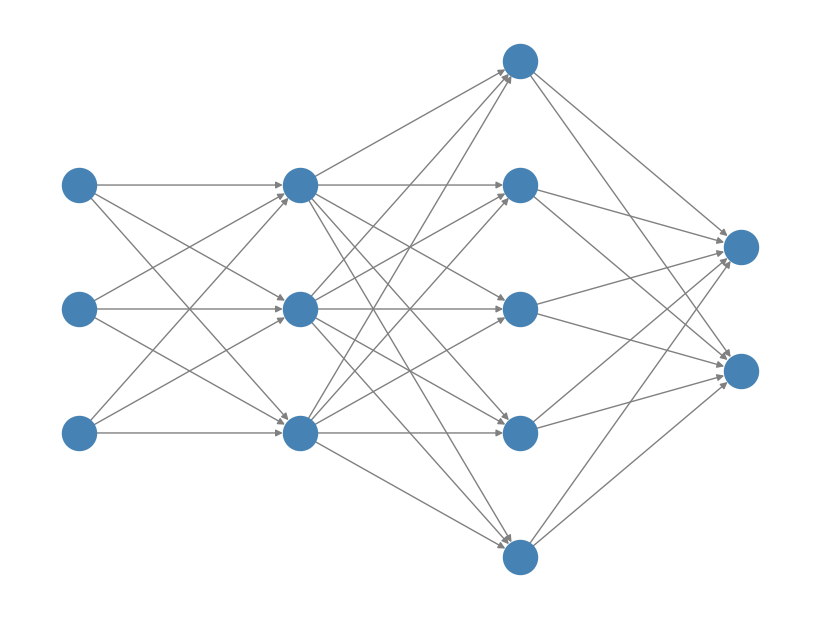

In [1]:

import matplotlib.pyplot as plt
import networkx as nx

def draw_neural_network(layers):
    G = nx.DiGraph()
    pos = {}
    node_id = 0
    x_spacing = 2
    y_spacing = 1.5
    max_layer_size = max(layers)
    
    for layer_idx, num_nodes in enumerate(layers):
        x = layer_idx * x_spacing
        y_offset = (max_layer_size - num_nodes) / 2
        for i in range(num_nodes):
            y = (i + y_offset) * y_spacing
            G.add_node(node_id, pos=(x, -y))
            pos[node_id] = (x, -y)
            node_id += 1
    
    prev_layer_nodes = list(range(layers[0]))
    current_node = layers[0]
    
    for layer_idx in range(1, len(layers)):
        current_layer_nodes = list(range(current_node, current_node + layers[layer_idx]))
        for prev_node in prev_layer_nodes:
            for curr_node in current_layer_nodes:
                G.add_edge(prev_node, curr_node)
        prev_layer_nodes = current_layer_nodes
        current_node += layers[layer_idx]
    
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=False, node_size=600, node_color='steelblue', edge_color='gray')
    plt.show()

layers = [3, 3, 5, 2]
draw_neural_network(layers)

In [80]:
import numpy as np 
class MLP:
    def __init__(self , num_inputs = 3 , num_hidden = [3 , 5] , num_outputs = 2):
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_outputs = num_outputs

        #each item in this liste represente the number neuron in the layer's item
        layers = [num_inputs] + num_hidden + [num_outputs]
        # initiate random weights
        weights = [] 

        for i in range ( len(layers) - 1 ) :
            w = np.random.rand(layers[i] , layers[i + 1]) # creating a matric of size layers[i] * layers[i + 1]
            weights.append(w)
        self.weights = weights 


    def forward_propagate(self , inputs ):
     
        activations = inputs

        for w in self.weights:

            net_inputs = np.dot(activations , w )
            activations = self._sigmoid(net_inputs)

        return activations

    def _sigmoid(self, x):
        y = 1.0 / (1 + np.exp(-x))
        return y

if __name__ == "__main__":

    # create a Multilayer Perceptron
    mlp = MLP()

    # set random values for network's input
    inputs = np.random.rand(mlp.num_inputs)

    # perform forward propagation
    output = mlp.forward_propagate(inputs)

    print("Network activation: {}".format(inputs))
    print("Network activation: {}".format(output))
        


Network activation: [0.71584442 0.69352436 0.96724338]
Network activation: [0.90396705 0.9198766 ]
